In [1]:
"""
Created on Wed Aug 4 17:50:06 2021

@author: Amol & Dwyer
"""

# set TF GPU memory growth so that it doesn't hog everything at once
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import os
import numpy as np
from main import *
debug_mode = True  # faster experiments for debugging

# util for getting objects' fields' names
field_names = lambda x: list(vars(x).keys())

def print_scientific_notation(number):
    power = int(np.log(number)/np.log(10))
    print(f"Scientific Notation: {(loss/10**power)}*10^{power}")

In [2]:
#Prepare the DataFrame that will be used downstream
dp = DataPreparer()
dp.createPCAs()
dp.sparsePCAs()
dp.zmixOrthogonalPCAs()
df = dp.getDataframe()

# currently passing dp eventually we want to abstract all the constants into 1 class
dm = DataManager(df, dp)

In [3]:
""" prepare PCDNNV2 for loading (from prior experiments) """

exprExec = PCDNNV2ExperimentExecutor()
exprExec.debug_mode = debug_mode
exprExec.setModelFactory(PCDNNV2ModelFactory())

Parent DNNModelFactory Instantiated
Parent DNNModelFactory Instantiated


2022-06-20 18:56:38.024246: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-20 18:56:38.408952: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14715 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


## Rapid Model Testing: 
### (requires setting up PCDNNV2 for loading)

In [6]:
# fix seeds
import random
import numpy as np
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

dataType = 'randomequaltraintestsplit' #'frameworkincludedtrainexcludedtest'
inputType = 'AllSpeciesAndZmix'
dependants = 'NoDependants'
dataSetMethod = f'{inputType}_{dataType}_{dependants}'
opscaler=ipscaler="MinMaxScaler"# 'PositiveLogNormal'
#opscaler=None
ZmixPresent = 'N'
concatenateZmix = 'N'
kernel_constraint = 'Y'
kernel_regularizer = 'N'
activity_regularizer = 'N'
noOfCpv = 4
noOfNeurons = 53

exprExec.modelFactory.loss='mae'
exprExec.modelFactory.activation_func='selu'
exprExec.modelFactory.dropout_rate=0.0
exprExec.debug_mode = False
exprExec.use_dependants = True
exprExec.use_dynamic_pred = True
exprExec.epochs_override = 100
exprExec.batch_size = 64
exprExec.n_models_override = 1

# initialize experiment executor...
exprExec.dm = dm
exprExec.df_experimentTracker = pd.DataFrame()
exprExec.modelType = 'PCDNNV2'

history = exprExec.executeSingleExperiment(noOfNeurons,dataSetMethod,dataType,inputType,ZmixPresent=ZmixPresent,
                                           noOfCpv=noOfCpv,concatenateZmix=concatenateZmix,kernel_constraint=kernel_constraint,
                                           kernel_regularizer=kernel_regularizer,activity_regularizer=activity_regularizer,
                                           opscaler=opscaler, ipscaler=ipscaler)

--------------------self.build_and_compile_pcdnn_v2_model----------------------
len testing df:  9331
53 4 N Y N N
Model: "container_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 species_input (InputLayer)     [(None, 53)]         0           []                               
                                                                                                  
 source_term_input (InputLayer)  [(None, 53)]        0           []                               
                                                                                                  
 emb_and_regression_model (Func  {'static_source_pre  350137     ['species_input[0][0]']          
 tional)                        diction': (None, 1)                                               
                                , 'dynamic_source_p                 

||                                                                                              ||
|| dropout_7 (Dropout)        (None, 64)           0           []                               ||
||                                                                                              ||
|| dense_8 (Dense)            (None, 32)           2080        []                               ||
||                                                                                              ||
|| dropout_8 (Dropout)        (None, 32)           0           []                               ||
||                                                                                              ||
|| dynamic_source_prediction (Den  (None, 4)       132         []                               ||
|| se)                                                                                          ||
||                                                                                              ||
|| static_

/home/dwyerdei/.conda/envs/rom-project/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/dwyerdei/.conda/envs/rom-project/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Epoch 1/100
73/73 [==============================] - 3s 21ms/step - loss: 2.0135 - dynamic_source_prediction_loss: 1.6550 - static_source_prediction_loss: 0.3585 - dynamic_source_prediction_R2_split: -11.5384 - dynamic_source_prediction_source_pred_mean: 0.0687 - dynamic_source_prediction_source_true_mean: 1.7164 - static_source_prediction_mae: 0.3585 - static_source_prediction_mse: 0.2581 - static_source_prediction_R2: -163.4960 - val_loss: 1.7270 - val_dynamic_source_prediction_loss: 1.6512 - val_static_source_prediction_loss: 0.0758 - val_dynamic_source_prediction_R2_split: -2165622308864.0000 - val_dynamic_source_prediction_source_pred_mean: 0.0531 - val_dynamic_source_prediction_source_true_mean: 1.7043 - val_static_source_prediction_mae: 0.0758 - val_static_source_prediction_mse: 0.0156 - val_static_source_prediction_R2: -1.7102
Epoch 2/100
73/73 [==============================] - 1s 17ms/step - loss: 1.6597 - dynamic_source_prediction_loss: 1.3926 - static_source_prediction_loss

Epoch 11/100
73/73 [==============================] - 1s 17ms/step - loss: 0.6400 - dynamic_source_prediction_loss: 0.5232 - static_source_prediction_loss: 0.1167 - dynamic_source_prediction_R2_split: -0.6296 - dynamic_source_prediction_source_pred_mean: 0.8044 - dynamic_source_prediction_source_true_mean: 1.1579 - static_source_prediction_mae: 0.1167 - static_source_prediction_mse: 0.0275 - static_source_prediction_R2: -7.2100 - val_loss: 0.7215 - val_dynamic_source_prediction_loss: 0.6762 - val_static_source_prediction_loss: 0.0453 - val_dynamic_source_prediction_R2_split: -441346392064.0000 - val_dynamic_source_prediction_source_pred_mean: 0.4578 - val_dynamic_source_prediction_source_true_mean: 1.1340 - val_static_source_prediction_mae: 0.0453 - val_static_source_prediction_mse: 0.0119 - val_static_source_prediction_R2: -0.4832
Epoch 12/100
73/73 [==============================] - 1s 17ms/step - loss: 0.5855 - dynamic_source_prediction_loss: 0.4794 - static_source_prediction_loss: 

Epoch 21/100
73/73 [==============================] - 1s 17ms/step - loss: 0.2794 - dynamic_source_prediction_loss: 0.2339 - static_source_prediction_loss: 0.0455 - dynamic_source_prediction_R2_split: -0.2550 - dynamic_source_prediction_source_pred_mean: 0.6237 - dynamic_source_prediction_source_true_mean: 0.7442 - static_source_prediction_mae: 0.0455 - static_source_prediction_mse: 0.0113 - static_source_prediction_R2: -0.4249 - val_loss: 0.1825 - val_dynamic_source_prediction_loss: 0.1520 - val_static_source_prediction_loss: 0.0305 - val_dynamic_source_prediction_R2_split: -3689471803392.0000 - val_dynamic_source_prediction_source_pred_mean: 0.5761 - val_dynamic_source_prediction_source_true_mean: 0.7277 - val_static_source_prediction_mae: 0.0305 - val_static_source_prediction_mse: 0.0107 - val_static_source_prediction_R2: -0.1538
Epoch 22/100
73/73 [==============================] - 1s 17ms/step - loss: 0.2579 - dynamic_source_prediction_loss: 0.2159 - static_source_prediction_loss:

Epoch 31/100
73/73 [==============================] - 1s 17ms/step - loss: 0.1313 - dynamic_source_prediction_loss: 0.1053 - static_source_prediction_loss: 0.0260 - dynamic_source_prediction_R2_split: -0.1592 - dynamic_source_prediction_source_pred_mean: 0.4282 - dynamic_source_prediction_source_true_mean: 0.4702 - static_source_prediction_mae: 0.0260 - static_source_prediction_mse: 0.0103 - static_source_prediction_R2: -0.0692 - val_loss: 0.0676 - val_dynamic_source_prediction_loss: 0.0422 - val_static_source_prediction_loss: 0.0253 - val_dynamic_source_prediction_R2_split: -inf - val_dynamic_source_prediction_source_pred_mean: 0.4187 - val_dynamic_source_prediction_source_true_mean: 0.4593 - val_static_source_prediction_mae: 0.0253 - val_static_source_prediction_mse: 0.0104 - val_static_source_prediction_R2: -0.0775
Epoch 32/100
73/73 [==============================] - 1s 17ms/step - loss: 0.1216 - dynamic_source_prediction_loss: 0.0958 - static_source_prediction_loss: 0.0257 - dynam

Epoch 41/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0621 - dynamic_source_prediction_loss: 0.0366 - static_source_prediction_loss: 0.0255 - dynamic_source_prediction_R2_split: -0.1332 - dynamic_source_prediction_source_pred_mean: 0.2926 - dynamic_source_prediction_source_true_mean: 0.3002 - static_source_prediction_mae: 0.0255 - static_source_prediction_mse: 0.0103 - static_source_prediction_R2: -0.0733 - val_loss: 0.0353 - val_dynamic_source_prediction_loss: 0.0099 - val_static_source_prediction_loss: 0.0253 - val_dynamic_source_prediction_R2_split: -inf - val_dynamic_source_prediction_source_pred_mean: 0.2876 - val_dynamic_source_prediction_source_true_mean: 0.2949 - val_static_source_prediction_mae: 0.0253 - val_static_source_prediction_mse: 0.0104 - val_static_source_prediction_R2: -0.0769
Epoch 42/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0573 - dynamic_source_prediction_loss: 0.0318 - static_source_prediction_loss: 0.0255 - dynam

Epoch 51/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0279 - dynamic_source_prediction_loss: 0.0024 - static_source_prediction_loss: 0.0255 - dynamic_source_prediction_R2_split: -inf - dynamic_source_prediction_source_pred_mean: 0.2140 - dynamic_source_prediction_source_true_mean: 0.2137 - static_source_prediction_mae: 0.0255 - static_source_prediction_mse: 0.0103 - static_source_prediction_R2: -0.0732 - val_loss: 0.0279 - val_dynamic_source_prediction_loss: 0.0026 - val_static_source_prediction_loss: 0.0253 - val_dynamic_source_prediction_R2_split: -inf - val_dynamic_source_prediction_source_pred_mean: 0.2141 - val_dynamic_source_prediction_source_true_mean: 0.2135 - val_static_source_prediction_mae: 0.0253 - val_static_source_prediction_mse: 0.0104 - val_static_source_prediction_R2: -0.0779
Epoch 52/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0279 - dynamic_source_prediction_loss: 0.0024 - static_source_prediction_loss: 0.0255 - dynamic_

Epoch 61/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0275 - dynamic_source_prediction_loss: 0.0020 - static_source_prediction_loss: 0.0255 - dynamic_source_prediction_R2_split: -inf - dynamic_source_prediction_source_pred_mean: 0.2144 - dynamic_source_prediction_source_true_mean: 0.2143 - static_source_prediction_mae: 0.0255 - static_source_prediction_mse: 0.0103 - static_source_prediction_R2: -0.0737 - val_loss: 0.0275 - val_dynamic_source_prediction_loss: 0.0021 - val_static_source_prediction_loss: 0.0254 - val_dynamic_source_prediction_R2_split: -inf - val_dynamic_source_prediction_source_pred_mean: 0.2144 - val_dynamic_source_prediction_source_true_mean: 0.2142 - val_static_source_prediction_mae: 0.0254 - val_static_source_prediction_mse: 0.0104 - val_static_source_prediction_R2: -0.0790
Epoch 62/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0275 - dynamic_source_prediction_loss: 0.0020 - static_source_prediction_loss: 0.0255 - dynamic_

Epoch 71/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0272 - dynamic_source_prediction_loss: 0.0017 - static_source_prediction_loss: 0.0255 - dynamic_source_prediction_R2_split: -inf - dynamic_source_prediction_source_pred_mean: 0.2144 - dynamic_source_prediction_source_true_mean: 0.2143 - static_source_prediction_mae: 0.0255 - static_source_prediction_mse: 0.0103 - static_source_prediction_R2: -0.0750 - val_loss: 0.0271 - val_dynamic_source_prediction_loss: 0.0018 - val_static_source_prediction_loss: 0.0253 - val_dynamic_source_prediction_R2_split: -inf - val_dynamic_source_prediction_source_pred_mean: 0.2144 - val_dynamic_source_prediction_source_true_mean: 0.2145 - val_static_source_prediction_mae: 0.0253 - val_static_source_prediction_mse: 0.0104 - val_static_source_prediction_R2: -0.0781
Epoch 72/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0272 - dynamic_source_prediction_loss: 0.0017 - static_source_prediction_loss: 0.0255 - dynamic_

Epoch 81/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0271 - dynamic_source_prediction_loss: 0.0016 - static_source_prediction_loss: 0.0255 - dynamic_source_prediction_R2_split: -inf - dynamic_source_prediction_source_pred_mean: 0.2143 - dynamic_source_prediction_source_true_mean: 0.2142 - static_source_prediction_mae: 0.0255 - static_source_prediction_mse: 0.0103 - static_source_prediction_R2: -0.0751 - val_loss: 0.0270 - val_dynamic_source_prediction_loss: 0.0016 - val_static_source_prediction_loss: 0.0253 - val_dynamic_source_prediction_R2_split: -inf - val_dynamic_source_prediction_source_pred_mean: 0.2143 - val_dynamic_source_prediction_source_true_mean: 0.2144 - val_static_source_prediction_mae: 0.0253 - val_static_source_prediction_mse: 0.0104 - val_static_source_prediction_R2: -0.0763
Epoch 82/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0270 - dynamic_source_prediction_loss: 0.0015 - static_source_prediction_loss: 0.0255 - dynamic_

Epoch 91/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0270 - dynamic_source_prediction_loss: 0.0015 - static_source_prediction_loss: 0.0255 - dynamic_source_prediction_R2_split: -inf - dynamic_source_prediction_source_pred_mean: 0.2142 - dynamic_source_prediction_source_true_mean: 0.2141 - static_source_prediction_mae: 0.0255 - static_source_prediction_mse: 0.0103 - static_source_prediction_R2: -0.0746 - val_loss: 0.0270 - val_dynamic_source_prediction_loss: 0.0016 - val_static_source_prediction_loss: 0.0253 - val_dynamic_source_prediction_R2_split: -inf - val_dynamic_source_prediction_source_pred_mean: 0.2142 - val_dynamic_source_prediction_source_true_mean: 0.2142 - val_static_source_prediction_mae: 0.0253 - val_static_source_prediction_mse: 0.0104 - val_static_source_prediction_R2: -0.0784
Epoch 92/100
73/73 [==============================] - 1s 17ms/step - loss: 0.0269 - dynamic_source_prediction_loss: 0.0014 - static_source_prediction_loss: 0.0255 - dynamic_

/home/dwyerdei/.conda/envs/rom-project/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/dwyerdei/.conda/envs/rom-project/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/dwyerdei/.conda/envs/rom-project/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/dwyerdei/.conda/envs/rom-project/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


                TAE           TSE  TRE           MAE           MSE  MRE  MAPE  \
count  1.000000e+00  1.000000e+00  1.0  1.000000e+00  1.000000e+00  1.0   1.0   
mean   9.143946e+13  1.329119e+25  inf  9.799535e+09  1.424412e+21  inf   inf   
std             NaN           NaN  NaN           NaN           NaN  NaN   NaN   
min    9.143946e+13  1.329119e+25  inf  9.799535e+09  1.424412e+21  inf   inf   
25%    9.143946e+13  1.329119e+25  NaN  9.799535e+09  1.424412e+21  NaN   NaN   
50%    9.143946e+13  1.329119e+25  NaN  9.799535e+09  1.424412e+21  NaN   NaN   
75%    9.143946e+13  1.329119e+25  NaN  9.799535e+09  1.424412e+21  NaN   NaN   
max    9.143946e+13  1.329119e+25  inf  9.799535e+09  1.424412e+21  inf   inf   

         #Pts  model_R2  
count     1.0       1.0  
mean   9331.0      -inf  
std       NaN       NaN  
min    9331.0      -inf  
25%    9331.0       NaN  
50%    9331.0       NaN  
75%    9331.0       NaN  
max    9331.0      -inf  
self.modelType: PCDNNV2 dataType: ra

/project/dwyer/home/rom_project/src/experiment_executor/pcdnn_v2_experiment_executor.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df_experimentTracker = self.df_experimentTracker.append(experimentRecord, ignore_index=True)


## Results Plotting & Analysis

In [55]:
import model_analyzer.model_analysis as model_analysis
import importlib; importlib.reload(model_analysis)

bestModel, experimentSettings = exprExec.modelFactory.openBestModel()
bestModel = exprExec.modelFactory.getEmbRegressor()
dm.createTrainTestData(experimentSettings['dataSetMethod'],experimentSettings['noOfCpv'], experimentSettings['ipscaler'], experimentSettings['opscaler'])

print(f'\nbestModel.input_shape: {bestModel.input_shape}')
print(f'\nexperimentSettings: {experimentSettings}')
inspector = model_analysis.ModelInspector(exprExec.modelFactory, dm)

len testing df:  9331

bestModel.input_shape: [(None, 53), (None, 1)]

experimentSettings: {'dataSetMethod': 'AllSpecies_randomequaltraintestsplit_AllDependants', 'ipscaler': None, 'opscaler': 'RobustScaler', 'noOfCpv': 8, 'ZmixPresent': 'Y', 'concatenateZmix': 'Y', 'kernel_constraint': 'N', 'kernel_regularizer': 'Y', 'activity_regularizer': 'N', 'input_data_cols': ['YiCH4', 'YiH', 'YiO', 'YiO2', 'YiOH', 'YiH2O', 'YiHO2', 'YiH2O2', 'YiC', 'YiCH', 'YiCH2', 'YiCH2(S)', 'YiCH3', 'YiH2', 'YiCO', 'YiCO2', 'YiHCO', 'YiCH2O', 'YiCH2OH', 'YiCH3O', 'YiCH3OH', 'YiC2H', 'YiC2H2', 'YiC2H3', 'YiC2H4', 'YiC2H5', 'YiC2H6', 'YiHCCO', 'YiCH2CO', 'YiHCCOH', 'YiN', 'YiNH', 'YiNH2', 'YiNH3', 'YiNNH', 'YiNO', 'YiNO2', 'YiN2O', 'YiHNO', 'YiCN', 'YiHCN', 'YiH2CN', 'YiHCNN', 'YiHCNO', 'YiHOCN', 'YiHNCO', 'YiNCO', 'YiC3H7', 'YiC3H8', 'YiCH2CHO', 'YiCH3CHO', 'YiN2', 'YiAR'], 'data_manager': <data.train_test_manager.DataManager object at 0x7f993c0e5e20>, 'val_losses': {'loss': -1.9208297729492188, 'dynamic_sourc

input names: ['input_1']
output names (before pruning): ['dynamic_source_prediction', 'static_source_prediction']
['zmix', 'cpv1', 'cpv2', 'cpv3', 'cpv4', 'cpv5', 'cpv6', 'cpv7', 'cpv8']


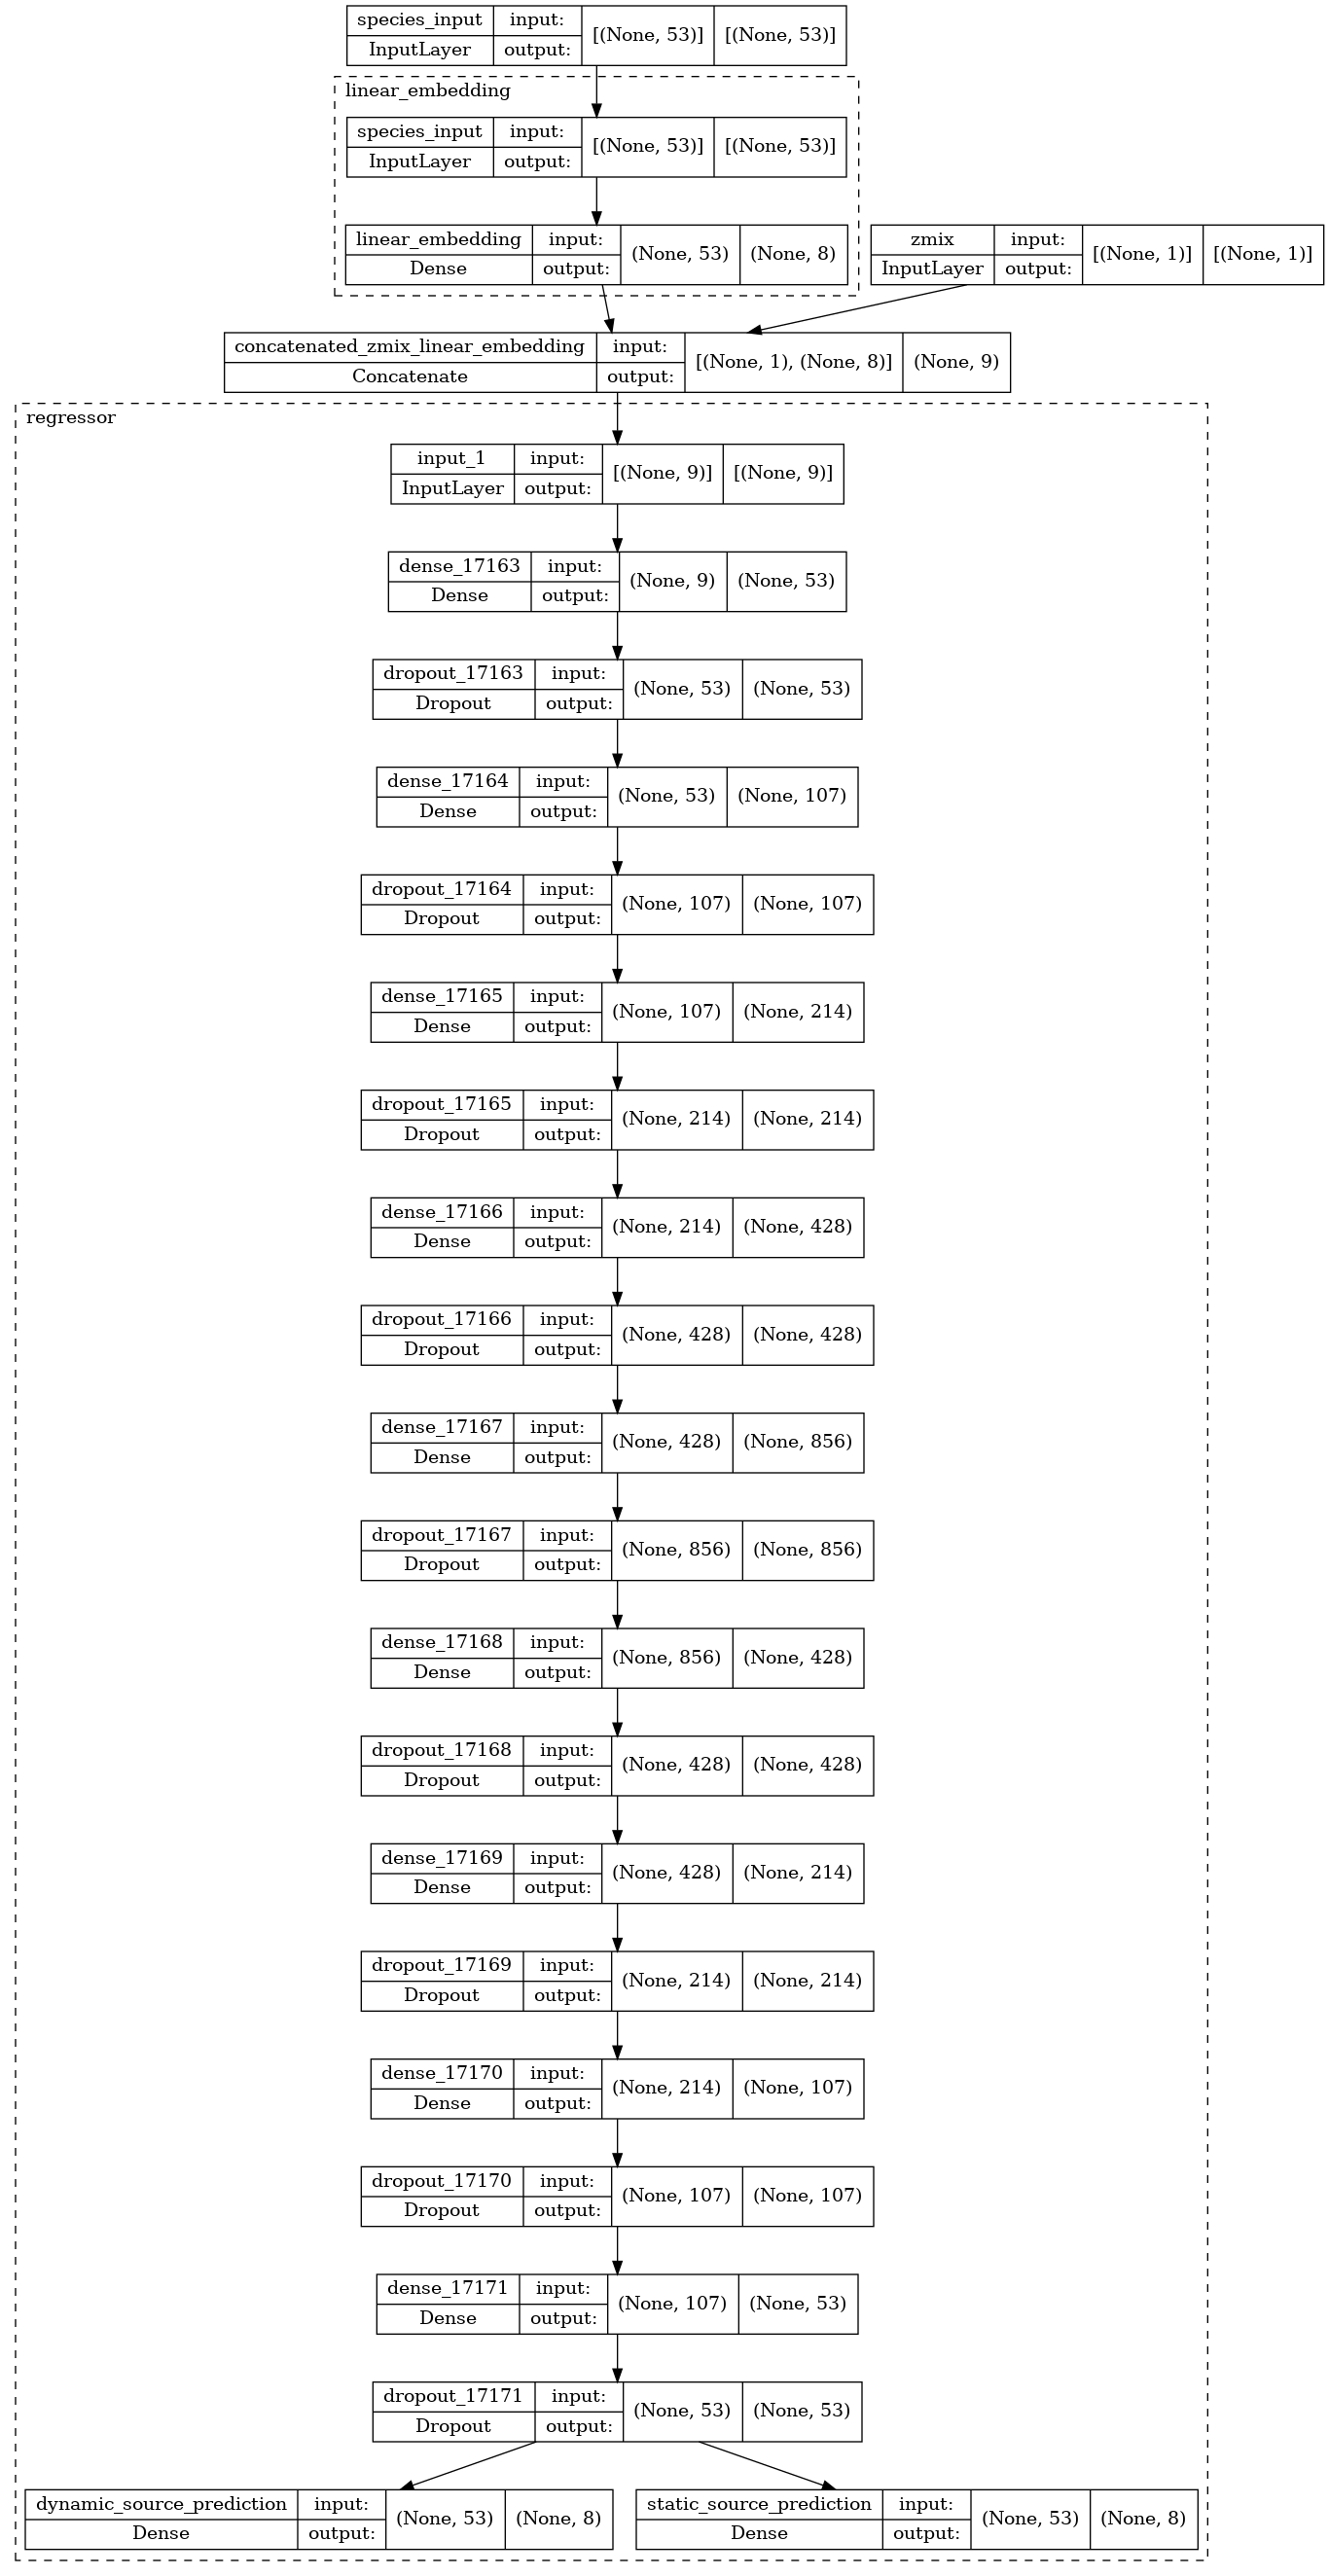

In [45]:
tf.keras.utils.plot_model(bestModel, expand_nested=True, show_shapes=True)

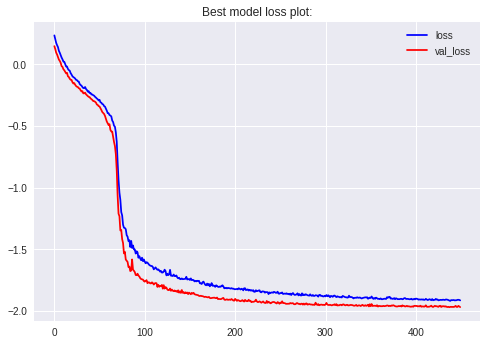

Best Model dev R^2 (combined):  0.9905698718339888
Best Model val static R^2: 0.9746235609054565
Best Model val dynamic R^2: 0.959162175655365


In [46]:
import matplotlib.pyplot as plt
plt.plot(experimentSettings['history']['loss'][50:], color='blue')
plt.plot(experimentSettings['history']['val_loss'][50:], color='red')
plt.legend(labels=['loss', 'val_loss'])
plt.title('Best model loss plot:')
plt.show()
print('Best Model dev R^2 (combined): ', experimentSettings['model_R2'])
print('Best Model val static R^2:', experimentSettings['val_losses']['emb_and_regression_model_R2'])
print('Best Model val dynamic R^2:', experimentSettings['val_losses']['dynamic_source_prediction_R2_split'])

cpv8; 1.535622e+05 +/- 1.602132e+03
cpv1; 1.526496e+05 +/- 2.473766e+03
zmix; 1.278547e+05 +/- 1.611125e+03
cpv3; 1.288011e+04 +/- 2.931723e+02
cpv7; 5.574393e+03 +/- 3.757640e+02
cpv6; 3.166440e+03 +/- 5.221377e+01
cpv5; 1.681610e+03 +/- 7.465459e+01
cpv4; 1.403945e+03 +/- 5.180237e+01
cpv2; 5.107344e+02 +/- 2.239055e+01


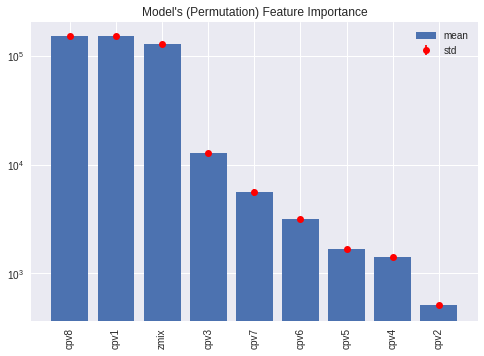

In [47]:
n_repeats = 5 if debug_mode else 20
inspector.plot_permutation_feature_importance(n_repeats=n_repeats)

         zmix      cpv1      cpv2      cpv3      cpv4      cpv5      cpv6  \
min  0.000000  0.000270  0.000069  0.000072  0.000109  0.003120  0.000020   
25%  0.229517  0.013105  0.000498  0.001724  0.002279  0.007838  0.002546   
50%  0.420747  0.039718  0.001577  0.007160  0.008777  0.014286  0.008601   
75%  0.648158  0.058028  0.011139  0.015792  0.014229  0.018252  0.013263   
max  0.974047  0.068651  0.029959  0.023727  0.019524  0.035709  0.016285   

         cpv7      cpv8  
min  0.002224  0.013880  
25%  0.003196  0.035879  
50%  0.005099  0.049429  
75%  0.021498  0.071139  
max  0.051509  0.081854  


/home/dwyerdei/.conda/envs/rom-project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


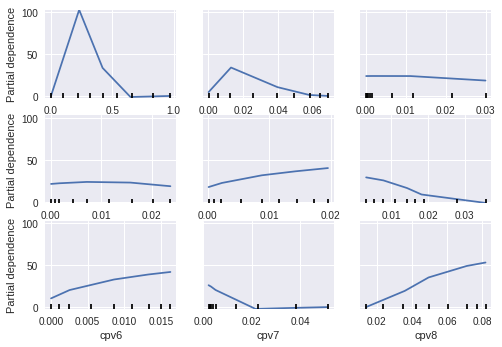

In [48]:
inspector.plot_partial_dependence()

#### Error Density by FlameId & XPos

In [49]:
def getResiduals(Y_test,Y_pred):
    return Y_test-Y_pred

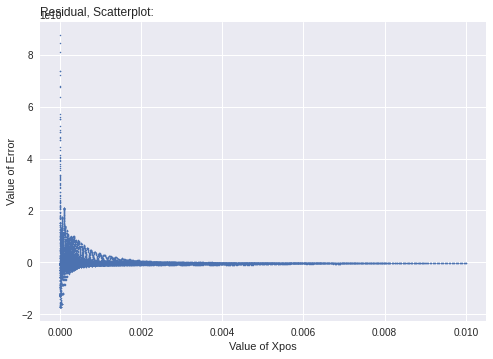

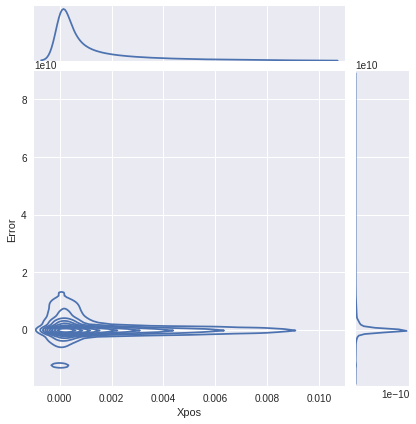

In [50]:
# TODO: Sanity check that this plots output ranges are correct? Seems like bug!
bestModel = exprExec.modelFactory.getEmbRegressor()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# libraries and data
plt.style.use('seaborn')

opscaler = dm.outputScaler
df = dp.getDataframe()
X, Y, Zmix, sources = dm.getAllData()
Y_test = Y
Y_pred = bestModel.predict({"species_input":X, "zmix":Zmix})['static_source_prediction']

# TODO: check should there be inverse transform here?
souener_pred = opscaler.inverse_transform(Y_pred)[:, dm.souener_index]
souener_test = opscaler.inverse_transform(Y_test)[:, dm.souener_index]

#residual/error

residuals = getResiduals(souener_test,souener_pred)
Xpos = df['Xpos']

plt_df = pd.DataFrame()
plt_df["Xpos"]=Xpos
plt_df["Error"] = residuals
# plot
plt.plot( 'Xpos', 'Error', data=plt_df, linestyle='', marker='o',markersize=1.5)
plt.xlabel('Value of Xpos')
plt.ylabel('Value of Error')
plt.title('Residual, Scatterplot:', loc='left')

# 2D density + marginal distribution:
sns.jointplot(x=plt_df.Xpos, y=plt_df.Error, kind='kde')
plt.title('Residual, Marginal Density plot:')

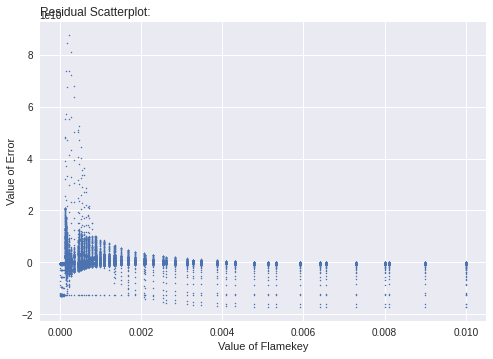

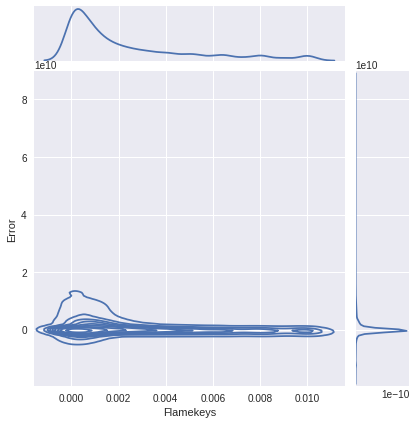

In [51]:
#residuals = getResiduals(Y_test_df['souener'].values,Y_pred_df['souener'].values)

flamekeys = df['flame_key']#np.append(halfData["flame_keys_test"],halfData["flame_keys_train"],axis=0)

plt_df = pd.DataFrame()
plt_df["Flamekeys"]=flamekeys
plt_df["Error"] = residuals
# plot
plt.plot( 'Flamekeys', 'Error', data=plt_df, linestyle='', marker='o',markersize=1.5)
plt.xlabel('Value of Flamekey')
plt.ylabel('Value of Error')
plt.title('Residual Scatterplot:', loc='left')

# 2D density + marginal distribution:
sns.jointplot(x=plt_df.Flamekeys, y=plt_df.Error, kind='kde')

Text(0.5, 1.0, 'Y_test histogram')

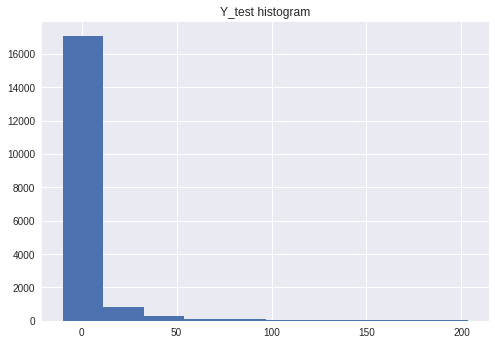

In [52]:
plt.hist(Y_test[:,0])
plt.title('Y_test histogram')

Text(0.5, 1.0, 'Y_pred histogram')

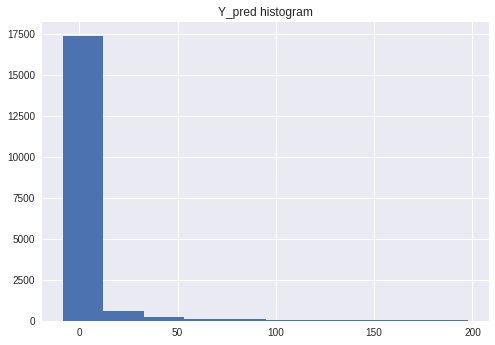

In [53]:
plt.hist(Y_pred[:,0])
plt.title('Y_pred histogram')